Length of train data:  4913
Length of validation data:  2420
Preprocessing done for the data.
 
Random Forest Model :
Log Loss : 1.5205985980966612
Accurcacy Score : 0.6082644628099173
[[1391  666]
 [ 282   81]]



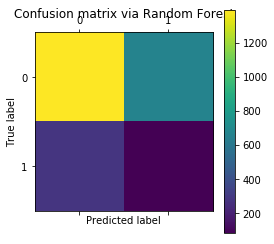

 
Logistic Regression : 
Log Loss : 0.6246351296988973
Accurcacy Score : 0.6909090909090909
[[1672  747]
 [   1    0]]



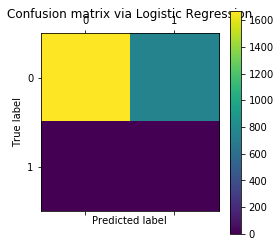

In [84]:
import pandas as pd
import datetime
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
    

df = pd.DataFrame()
train_cols = []
train_Y = pd.DataFrame()


def main():

    df, test_len, train_Y, test_Y = readData()

    # Remove columns with maximum unique values
    df = removecols(df)

    # Make traing and validation set of data
    train_data = df[1:(len(df) - test_len + 1)]
    test_data = df[(len(train_data)):]

    print ("Length of train data: ", len(train_data))
    print ("Length of validation data: ", len(test_data))

    # print(train_data)
    # Scaling the values for the parameters
    sl = preprocessing.StandardScaler()
    sl.fit(train_data)
    train_data = sl.transform(train_data)
    sl.fit(test_data)
    test_data = sl.transform(test_data)
    print ("Preprocessing done for the data.")

    # Running different classifiers on data
    print(' ')
    RandomForestModel(train_data, test_data, train_Y, test_Y)
    print(' ')
    logisticModel(train_data, test_data, train_Y, test_Y)
    

def readData():
    # Read the file in panda dataframe
    df = pd.read_csv('data/feature_train_labelled.csv')
    #df['user_age'] = df['user_age'].fillna(df['user_age'].mean())
    # df = df.drop('interested', 1)
    df = df.drop('not_interested', 1)
    df = df.drop('user', 1)
    df = df.drop('event', 1)
    X, y = df.drop('interested', 1), df['interested']
    # X, y = df.drop('not_interested', 1), df['not_interested']

    # Splitting data into training and validation set
    df, test_df, train_Y, test_Y = train_test_split(X, y, test_size=0.33, random_state=42)
    df = df.append(test_df)
    return df, len(test_df), train_Y, test_Y

# Calculate number of unique values in each columns and
# Dropping the columns with all or maximum unique values
def removecols(df):
    for col in list(df.columns.values):
        # print 'Number of unique values in', col, 'is :', len(df[col].unique())
        if (len(df) * 0.75) <= len(df[col].unique()):
            df = df.drop(col, 1)
    return df


def RandomForestModel(train_data, test_data, train_Y, test_Y):

    model = RandomForestClassifier()
    model.fit(train_data, train_Y)
    # print(model)

    # Make predictions
    predicted = model.predict_proba(test_data)
    #print ("Predicted : " ,predicted[0:,1])
    print ("Random Forest Model :")
    print ('Log Loss :', metrics.log_loss(test_Y, predicted[0:,1]))
    print('Accurcacy Score :' , metrics.accuracy_score(test_Y, predicted[:,1].round()))
    confusion_matrixRF = confusion_matrix(predicted[:,1].round(), test_Y)
    print(confusion_matrixRF)
    plt.matshow(confusion_matrixRF)
    plt.title('Confusion matrix via Random Forest')
    print('')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    


def logisticModel(train_data, test_data, train_Y, test_Y):

    # fit a logistic regression model to the data
    model = LogisticRegression()
    model.fit(train_data, train_Y)
   
    # Make predictions
    predicted = model.predict_proba(test_data)
    #print ("Predicted : " ,predicted[0:,1])
    print ("Logistic Regression : ")
    print ('Log Loss :', metrics.log_loss(test_Y, predicted[0:,1]))
    print('Accurcacy Score :' , metrics.accuracy_score(test_Y, predicted[:,1].round()))
    confusion_matrixLR = confusion_matrix(predicted[:,1].round(), test_Y)
    print(confusion_matrixLR)
    plt.matshow(confusion_matrixLR)
    plt.title('Confusion matrix via Logistic Regression')
    print('')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 
   




if __name__=="__main__":
    main()